# Cardiac Metric Quantification for Fabry Disease

### Install Packages

In [1]:
%%bash
pip install --upgrade pip -q
pip install matplotlib numpy==1.26.4 pydicom scikit-image scikit-learn opencv-python-headless -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dxdata 0.41.0 requires networkx==2.8.8; python_version >= "3.8", but you have networkx 3.4.2 which is incompatible.
dxdata 0.41.0 requires numpy==1.23.5; python_version >= "3.8", but you have numpy 1.26.4 which is incompatible.


### Clone `ukbb_cardiac` Fork and Requirements

In [3]:
%%bash
git clone https://github.com/BioMeDS/ukbb_cardiac

apt-get -qq update && apt-get -qq install -y libxrender1 unzip apt-utils
pip install --upgrade pip -q
pip install scipy matplotlib seaborn python-dateutil pydicom SimpleITK nibabel scikit-image vtk -q
pip install opencv-python-headless tensorflow pandas==2.2.0 numpy==1.26 -q

Cloning into 'ukbb_cardiac'...
Updating files: 100% (65/65), done.
debconf: delaying package configuration, since apt-utils is not installed


Selecting previously unselected package apt-utils.
(Reading database ... 23341 files and directories currently installed.)
Preparing to unpack .../apt-utils_2.0.10_amd64.deb ...
Unpacking apt-utils (2.0.10) ...
Selecting previously unselected package libxrender1:amd64.
Preparing to unpack .../libxrender1_1%3a0.9.10-1_amd64.deb ...
Unpacking libxrender1:amd64 (1:0.9.10-1) ...
Selecting previously unselected package unzip.
Preparing to unpack .../unzip_6.0-25ubuntu1.2_amd64.deb ...
Unpacking unzip (6.0-25ubuntu1.2) ...
Setting up apt-utils (2.0.10) ...
Setting up libxrender1:amd64 (1:0.9.10-1) ...
Setting up unzip (6.0-25ubuntu1.2) ...
Processing triggers for mime-support (3.64ubuntu1) ...
Processing triggers for libc-bin (2.31-0ubuntu9.16) ...


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dxdata 0.41.0 requires networkx==2.8.8; python_version >= "3.8", but you have networkx 3.4.2 which is incompatible.
dxdata 0.41.0 requires numpy==1.23.5; python_version >= "3.8", but you have numpy 1.26.0 which is incompatible.
dxdata 0.41.0 requires pandas==1.5.3; python_version >= "3.8", but you have pandas 2.2.0 which is incompatible.


## Compare Fabry Cohort with Matched Control Group

In [ ]:
import pandas as pd

df = pd.read_csv('/opt/notebooks/fabry_table.csv')
df = df.iloc[:9, :]
df.to_csv('/opt/notebooks/test.csv', index=False)

/tmp/ipykernel_6208/3428833542.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/tmp/ipykernel_6279/2089130230.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ 

	Fabry cases:	 18
	Matches each:	 5
	Traits matched:	 ['Sex', 'Age when attended assessment centre | Instance 2']
___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ 

Processing Fabry patient 1550259 (1/18)...
Offset for soft-matching is ±0.              

Processing Fabry patient 1811876 (2/18)...
Measurement of image 1048788 failed. This image is omitted from further analysis.
Offset for soft-matching is ±0.              

Processing Fabry patient 2237128 (3/18)...
Measurement of image 1092252 failed. This image is omitted from further analysis.
Measurement of image 1128904 failed. This image is omitted from further analysis.
Offset for soft-matching is ±0.              

Processing Fabry patient 2258872 (4/18)...
Soft-matching with trait Age when attended assessment centre | Instance 2.
Offset for soft-matching is ±1.              

P

/opt/conda/lib/python3.11/site-packages/skimage/util/dtype.py:338: RuntimeWarning: invalid value encountered in cast
  return image_out.astype(dtype_out)


!! bloodpool type: <class 'float'>
Measurement of image 3605486 failed. This image is omitted from further analysis.
Offset for soft-matching is ±0.              

Processing Fabry patient 4656331 (13/18)...
Offset for soft-matching is ±0.              

Processing Fabry patient 4885674 (14/18)...
Measurement of image 1074431 failed. This image is omitted from further analysis.
Offset for soft-matching is ±0.              

Processing Fabry patient 5032679 (15/18)...
Offset for soft-matching is ±0.              

Processing Fabry patient 5080697 (16/18)...
Measurement of image 1154628 failed. This image is omitted from further analysis.
Offset for soft-matching is ±0.              

Processing Fabry patient 5876855 (17/18)...
Offset for soft-matching is ±0.              

Processing Fabry patient 6021118 (18/18)...
Soft-matching with trait Age when attended assessment centre | Instance 2.
Offset for soft-matching is ±2.              

          cardiac-healthy control vs Fabry
p(hor.) 

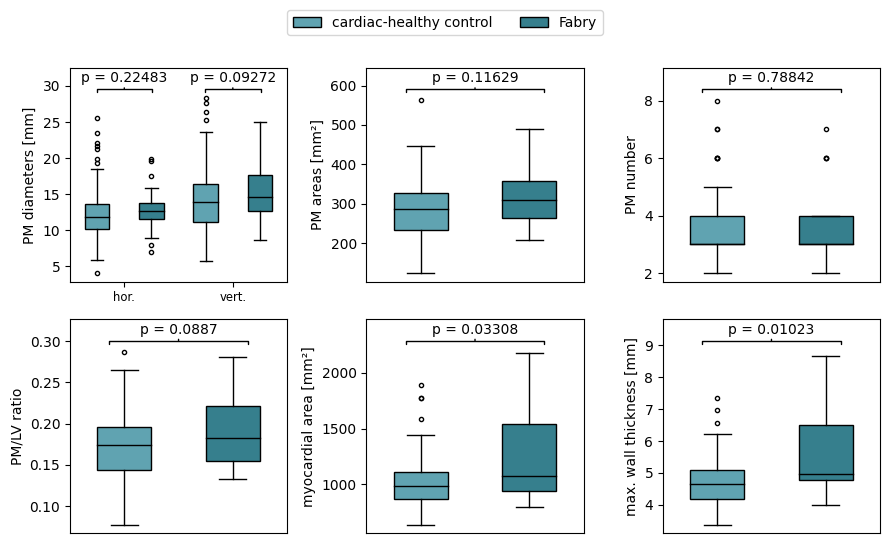

In [ ]:
import pandas as pd

from ukb_functions import read_dicom, quantify_pms

## !! the participant IDs are randomized for each project, so select your own template and crop it manually
template = read_dicom('/mnt/project/Bulk/Heart MRI/Short axis/10/1000659_20209_2_0.zip', print_output=False)
template = template[75:120, 50:95, 4, :]

## this might take a long time for larger sample sizes without gpu
## but it should automatically use gpu for ukbb_cardiac, if run in a gpu instance
c_measurements, f_measurements, segmentations = quantify_pms(
    fabry_table_path='/opt/notebooks/fabry_table.csv', 
    control_table_path='/opt/notebooks/control_table.csv', 
    template_array=template, 
    nmatches=5, 
    match_behaviour='softmatch',
    show_segmentations=False)

pd.DataFrame(f_measurements).to_csv('/opt/notebooks/results/fabry_measurements.csv', index=False)
pd.DataFrame(c_measurements).to_csv('/opt/notebooks/results/control_measurements.csv', index=False)

          cardiac-healthy control (n = 90) vs Fabry (n = 18)
p(hor.)                                             0.224827
p(vert.)                                            0.092725
p(area)                                             0.116285
p(num)                                              0.788423
p(pm/lv)                                            0.088696
p(ma)                                               0.033081
p(mwt)                                              0.010232
d(hor.)                                             0.100641
d(vert.)                                            0.219767
d(area)                                             0.358664
d(num)                                               0.10696
d(pm/lv)                                            0.479178
d(ma)                                               0.626437
d(mwt)                                              0.747415
MD(hor.)                                             0.39063
MD(vert.)               

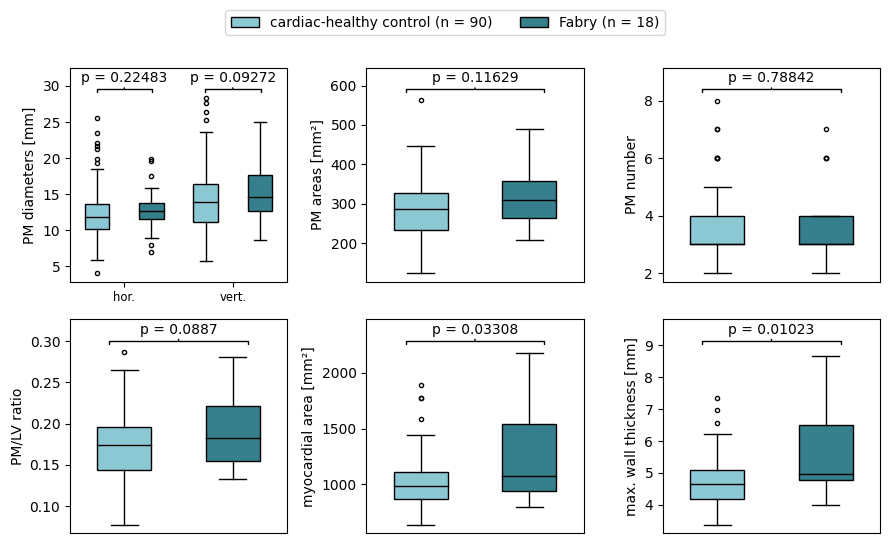

In [ ]:
import pandas as pd
from ukb_functions import plot_measurements, thesis_colors

# get measurements
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements.csv').to_dict('list')
f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements.csv').to_dict('list')

labels = ['cardiac-healthy control', 'Fabry']
labels = [l+' (n = '+str(len(m))+')' for l, m in zip(labels, [c_measurements['id'], f_measurements['id']])]

plot_measurements([c_measurements, f_measurements], labels=labels, colors=thesis_colors('ld'))

### Plot ROC curves

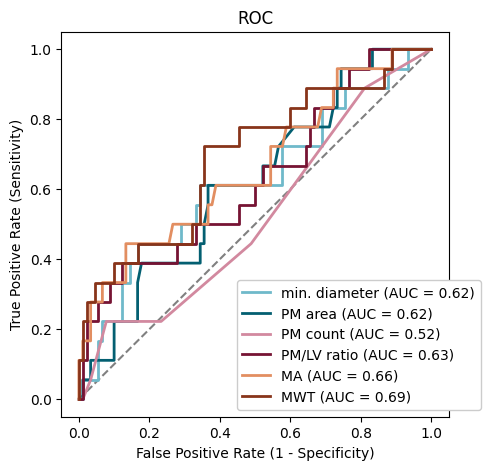

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn

from ukb_functions import thesis_colors, get_colors

# get measurements
#c_measurements = c_measurements.to_dict('list')
#f_measurements = f_measurements.to_dict('list')

c_diams = [[c_measurements[k][i] for k in ['hdiam1', 'hdiam2', 'vdiam1', 'vdiam2']] for i in range(len(c_measurements['hdiam1']))]
f_diams = [[f_measurements[k][i] for k in ['hdiam1', 'hdiam2', 'vdiam1', 'vdiam2']] for i in range(len(f_measurements['hdiam1']))]

# only use minimum diameter for each patient
c_diams_min = [min(d) for d in c_diams]
f_diams_min = [min(d) for d in f_diams]

# plot roc curve

plt.figure(figsize=[5, 5])  
plt.title('ROC')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance

def plot_roc(C, F, color, label):
    y_true = np.array([0] * len(C) + [1] * len(F))
    y_scores = np.array(C + F)
    fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_scores) 
    roc_auc = sklearn.metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2, label=label+' (AUC = '+str(np.round(roc_auc, 2))+')')

controls = [c_diams_min, c_measurements['area'], c_measurements['num'], c_measurements['pm/lv ratio'], c_measurements['ma'], c_measurements['mwt']]
fabrys = [f_diams_min, f_measurements['area'], f_measurements['num'], f_measurements['pm/lv ratio'], f_measurements['ma'], f_measurements['mwt']]
#controls = [c_measurements['ma'], c_measurements['mwt']]
#fabrys = [f_measurements['ma'], f_measurements['mwt']]
colors = thesis_colors('ld')
labels = ['min. diameter', 'PM area', 'PM count', 'PM/LV ratio', 'MA', 'MWT']
#labels = ['MA', 'MWT']

for i in range(len(controls)):
    plot_roc(controls[i], fabrys[i], colors[i], labels[i])

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc='lower right', bbox_to_anchor=(1.1, 0.0), framealpha=1.0)
plt.show()

### Compare Age

Fabry mean age: 64.0
Control mean age: 63.922222222222224


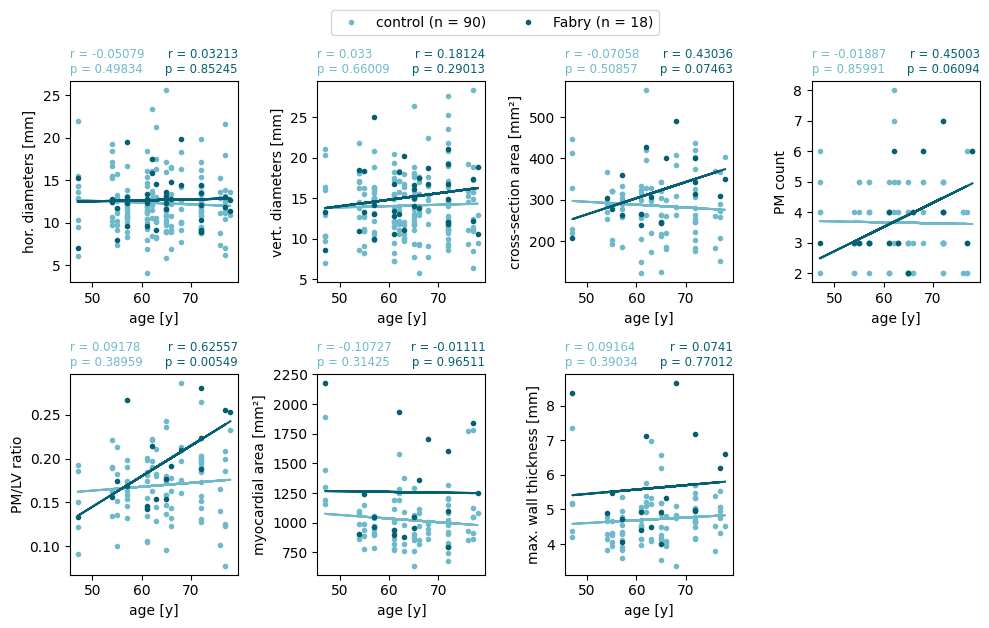

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from ukb_functions import get_colors, thesis_colors

colors = get_colors(thesis_colors('ld'), 2)

# get measurements
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements.csv').to_dict('list')
f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements.csv').to_dict('list')

c_table = pd.read_csv('/opt/notebooks/control_table.csv')
f_table = pd.read_csv('/opt/notebooks/fabry_table.csv')

for m, t in zip([c_measurements, f_measurements], [c_table, f_table]):
    m['age'] = []
    for i in m['id']:
        age = t.loc[t['Participant ID'] == i, 'Age when attended assessment centre | Instance 2'].values[0]
        m['age'].append(age)

fig, _ = plt.subplots(2, 4, figsize=(10, 6))

def fit(X, Y, control=False, label=False):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    yfit = [a + b * xi for xi in X]
    
    if control:
        color=colors[0]
        # alpha=0.5
        alpha=1.0
        loc='left'
    else:
        color=colors[1]
        alpha=1.0
        loc='right'
    if label == False:
        plt.plot(X, Y, color=color, linestyle='', marker='.', alpha=alpha)
    else:
        plt.plot(X, Y, color=color, linestyle='', marker='.', alpha=alpha, label=label)
    plt.plot(X, yfit, color=color, alpha=alpha)
    r, p = scipy.stats.pearsonr(X, Y)
    plt.title('r = '+str(np.round(r, 5))+'\np = '+str(np.round(p, 5)), loc=loc, color=color, fontsize='small')

def plot_fit(c, f, key, ylabel, label=False):
    if label == False:
        label = [False, False]
    
    if type(key) is str or (type(key) is list and len(key) == 1):
        fit(c['age'], c[key], control=True, label=label[0])
        fit(f['age'], f[key], label=label[1])
    else:
        fit(c['age']*len(key), [i for k in key for i in c[k]], control=True, label=label[0])
        fit(f['age']*len(key), [i for k in key for i in f[k]], label=label[1])
    plt.xlabel('age [y]')
    plt.ylabel(ylabel)

plt.subplot(2, 4, 1)
plot_fit(c_measurements, f_measurements, ['hdiam1', 'hdiam2'], 'hor. diameters [mm]', 
         label=['control (n = '+str(len(c_measurements['id']))+')', 'Fabry (n = '+str(len(f_measurements['id']))+')'])

plt.subplot(2, 4, 2)
plot_fit(c_measurements, f_measurements, ['vdiam1', 'vdiam2'], 'vert. diameters [mm]')

keys = ['area', 'num', 'pm/lv ratio', 'ma', 'mwt']
labels = ['cross-section area [mm²]', 'PM count', 'PM/LV ratio', 'myocardial area [mm²]', 'max. wall thickness [mm]']
for i, p in enumerate(range(3, 8)):
    plt.subplot(2, 4, p)
    plot_fit(c_measurements, f_measurements, keys[i], labels[i])

plt.subplot(2, 4, 8)
plt.gca().axis('off')
    
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.tight_layout()

# get mean age
print('Fabry mean age:', np.mean(f_measurements['age']))
print('Control mean age:', np.mean(c_measurements['age']))

### Compare Sex

/tmp/ipykernel_6279/2400673358.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  m['sex'][i] = t.loc[t['Participant ID'] == this_id, 'Sex'].values[0]
/tmp/ipykernel_6279/2400673358.py:16: SettingWithCopyWarning: 
A value is trying to be s

          female control (n = 75) vs female Fabry (n = 15)  \
p(hor.)                                           0.488369   
p(vert.)                                          0.055325   
p(area)                                           0.077561   
p(num)                                            0.689916   
p(pm/lv)                                          0.205257   
p(ma)                                             0.048156   
p(mwt)                                              0.0272   
d(hor.)                                            0.16299   
d(vert.)                                          0.392408   
d(area)                                           0.501461   
d(num)                                            0.162014   
d(pm/lv)                                          0.423882   
d(ma)                                             0.639431   
d(mwt)                                            0.626187   
MD(hor.)                                          0.832202   
MD(vert.

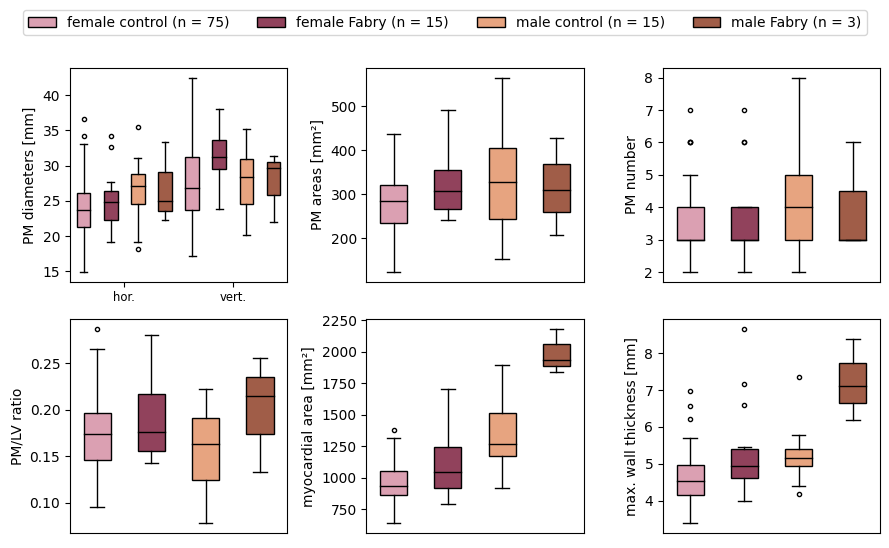

In [ ]:
import pandas as pd
from ukb_functions import plot_measurements, thesis_colors

colors = thesis_colors('ld')[2:]

# sort measurements
fabry_table = pd.read_csv('/opt/notebooks/fabry_table.csv')
control_table = pd.read_csv('/opt/notebooks/control_table.csv')

f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements.csv')
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements.csv')

for m, t in zip([f_measurements, c_measurements], [fabry_table, control_table]):
    m['sex'] = [0]*len(m['id'])
    for i, this_id in enumerate(m['id'].to_list()):
        m.loc[i, 'sex'] = t.loc[t['Participant ID'] == this_id, 'Sex'].values[0]

f_measurements_m = f_measurements.loc[f_measurements['sex'] == 'Male'].copy()
f_measurements_f = f_measurements.loc[f_measurements['sex'] == 'Female'].copy()
c_measurements_m = c_measurements.loc[c_measurements['sex'] == 'Male'].copy()
c_measurements_f = c_measurements.loc[c_measurements['sex'] == 'Female'].copy()

labels = ['female control', 'female Fabry', 'male control', 'male Fabry']
labels = [l+' (n = '+str(len(m))+')' for l, m in zip(labels, [c_measurements_f, f_measurements_f, c_measurements_m, f_measurements_m])]

plot_measurements(
    [c_measurements_f, f_measurements_f, c_measurements_m, f_measurements_m], 
    labels=labels, 
    colors=colors, save_stats=False)

### Compare Phenotypes

          control classical (n = 25) vs Fabry classical (n = 5)  \
p(hor.)                                              0.95704      
p(vert.)                                            0.914193      
p(area)                                             0.616446      
p(num)                                              0.525868      
p(pm/lv)                                             0.95704      
p(ma)                                               0.845539      
p(mwt)                                              0.300451      
d(hor.)                                             0.000481      
d(vert.)                                            0.015508      
d(area)                                             0.147387      
d(num)                                              0.185475      
d(pm/lv)                                            0.003724      
d(ma)                                               0.268022      
d(mwt)                                               0.60071  

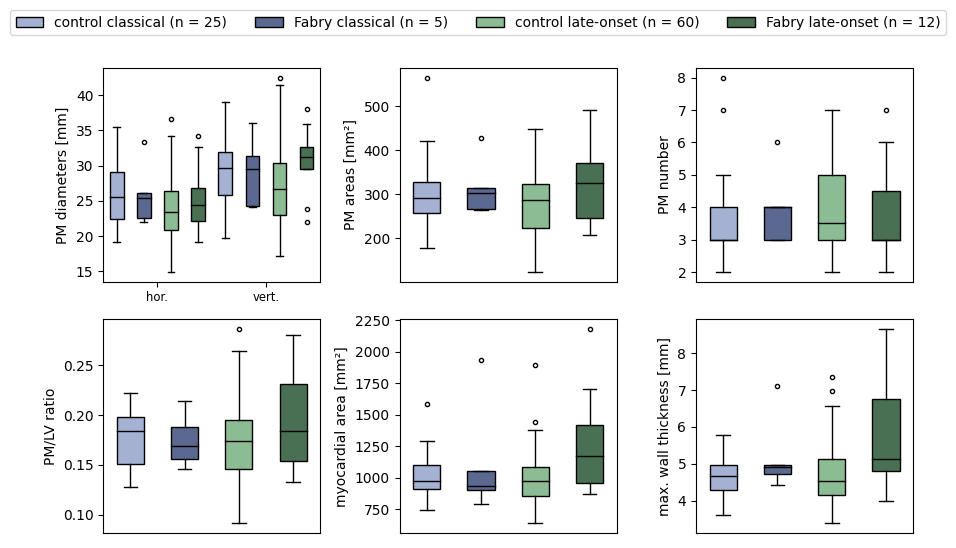

In [ ]:
import pandas as pd
from ukb_functions import plot_measurements, thesis_colors

colors = thesis_colors('ld')[6:]

# get measurements
f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements-3.csv')
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements-3.csv')

# sort measurements

pht_table = pd.read_csv('/opt/notebooks/Phenotypes.csv')

f_measurements['phenotype'] = ['']*len(f_measurements['id'])

for i, this_id in enumerate(f_measurements['id']):
    try:
        p = pht_table.loc[pht_table['Patient ID'] == this_id, ' Phenotype'].values[0]
    except:
        p = 'unclear'
    f_measurements.loc[i, 'phenotype'] = p

f_measurements_cl = f_measurements.loc[f_measurements['phenotype'] == ' classic'].copy()
f_measurements_lo = f_measurements.loc[f_measurements['phenotype'] == ' late onset'].copy()

# get matched controls
cl_ids = f_measurements_cl['id'].tolist()
lo_ids = f_measurements_lo['id'].tolist()
c_measurements_cl = c_measurements.loc[c_measurements['match for'].isin(cl_ids)].copy()
c_measurements_lo = c_measurements.loc[c_measurements['match for'].isin(lo_ids)].copy()

labels = ['control classical', 'Fabry classical', 'control late-onset', 'Fabry late-onset']
labels = [l+' (n = '+str(len(m))+')' for l, m in zip(labels, [c_measurements_cl, f_measurements_cl, c_measurements_lo, f_measurements_lo])]

plot_measurements(
    [c_measurements_cl, f_measurements_cl, c_measurements_lo, f_measurements_lo], 
    labels=labels,
    colors=colors)

## Compare Fabry Cohort with Two Controls

___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ 

	Fabry cases:	 18
	Matches each:	 5
	Traits matched:	 ['Sex', 'Age when attended assessment centre | Instance 2']
___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ ___ 

Processing Fabry patient 1550259 (1/18)...
Soft-matching with trait Age when attended assessment centre | Instance 2.
Offset for soft-matching is ±1.              

Processing Fabry patient 1811876 (2/18)...
Soft-matching with trait Age when attended assessment centre | Instance 2.


/opt/conda/lib/python3.11/site-packages/skimage/util/dtype.py:338: RuntimeWarning: invalid value encountered in cast
  return image_out.astype(dtype_out)


!! bloodpool type: <class 'float'>
Measurement of image 1249598 failed. This image is omitted from further analysis.
Measurement of image 2006042 failed. This image is omitted from further analysis.
Offset for soft-matching is ±1.              

Processing Fabry patient 2237128 (3/18)...
Offset for soft-matching is ±0.              

Processing Fabry patient 2258872 (4/18)...
Offset for soft-matching is ±0.              

Processing Fabry patient 2326437 (5/18)...
Measurement of image 2293107 failed. This image is omitted from further analysis.
Offset for soft-matching is ±0.              

Processing Fabry patient 3064804 (6/18)...
Offset for soft-matching is ±0.              

Processing Fabry patient 3485721 (7/18)...
Soft-matching with trait Age when attended assessment centre | Instance 2.
Offset for soft-matching is ±3.              

Processing Fabry patient 3494046 (8/18)...
Measurement of image 1188576 failed. This image is omitted from further analysis.
Offset for soft-matchi

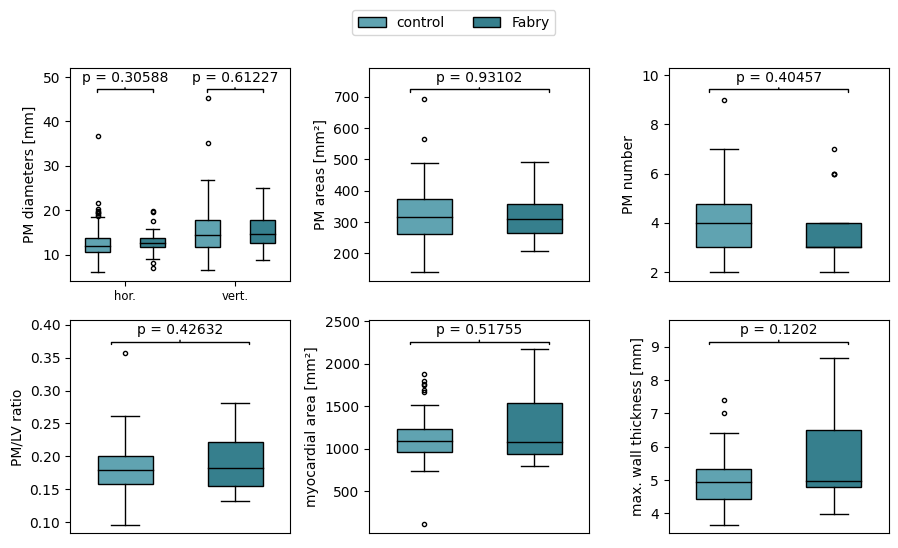

In [ ]:
import pandas as pd
from ukb_functions import read_dicom, quantify_pms

## !! again, change the template
template = read_dicom('/mnt/project/Bulk/Heart MRI/Short axis/10/1000659_20209_2_0.zip', print_output=False)
template = template[75:120, 50:95, 4, :]

# measure Fabry and heart attack control

h_measurements, _, segmentations = quantify_pms(
    fabry_table_path='/opt/notebooks/fabry_table.csv', 
    control_table_path='/opt/notebooks/heart_attack_table.csv', 
    template_array=template, 
    nmatches=5, 
    match_behaviour='softmatch', 
    show_segmentations=False)

pd.DataFrame(h_measurements).to_csv('/opt/notebooks/results/ha_measurements.csv', index=False)

          control (n = 90) vs heart attack control (n = 90)  \
p(hor.)                                            0.652543   
p(vert.)                                           0.097602   
p(area)                                            0.008272   
p(num)                                             0.084535   
p(pm/lv)                                           0.087375   
p(ma)                                              0.001625   
p(mwt)                                             0.022513   
d(hor.)                                            0.049149   
d(vert.)                                           0.189593   
d(area)                                            0.344702   
d(num)                                             0.205653   
d(pm/lv)                                           0.214984   
d(ma)                                              0.314605   
d(mwt)                                             0.244753   
MD(hor.)                                           0.20

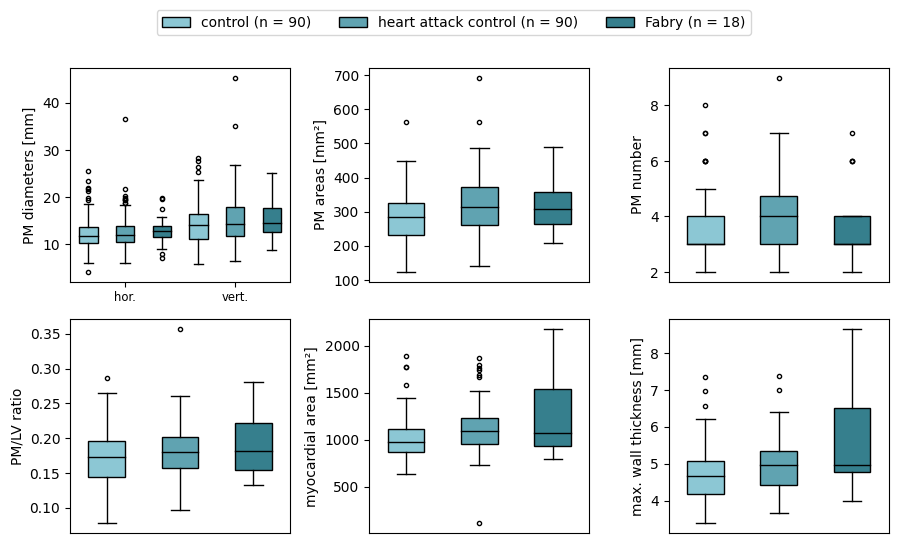

In [ ]:
## import pandas as pd
from ukb_functions import plot_measurements, thesis_colors

# get measurements
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements.csv').to_dict('list')
h_measurements = pd.read_csv('/opt/notebooks/results/ha_measurements.csv').to_dict('list')
f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements.csv').to_dict('list')

labels = ['control', 'heart attack control', 'Fabry']
labels = [l+' (n = '+str(len(m))+')' for l, m in zip(labels, [c_measurements['id'], h_measurements['id'], f_measurements['id']])]

plot_measurements([c_measurements, h_measurements, f_measurements], labels=labels, colors=thesis_colors('lmd'))

### Compare Age

Fabry mean age: 64.0
Heart attack control mean age: 64.02222222222223


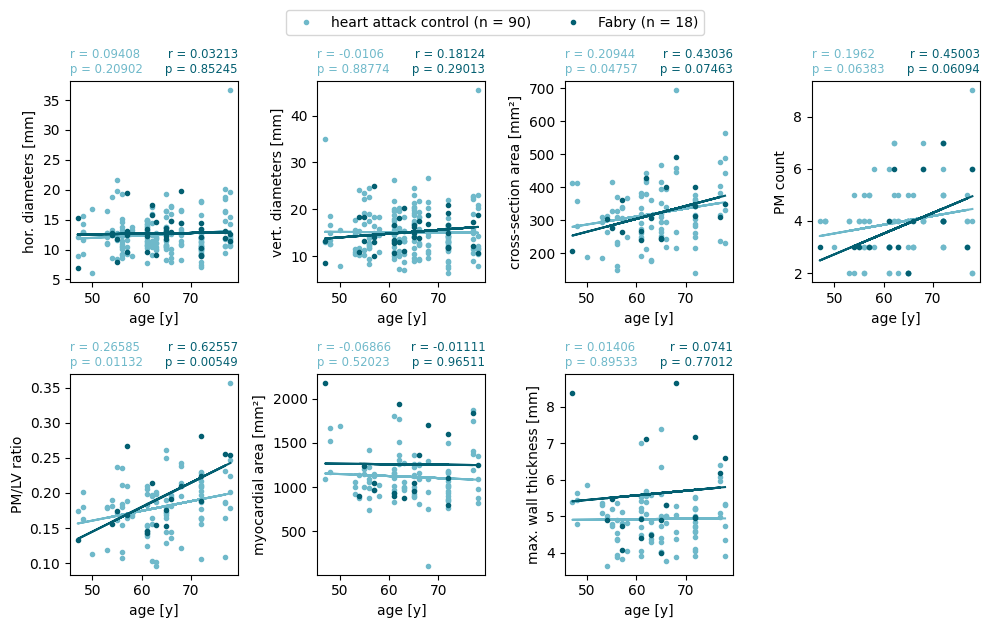

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

from ukb_functions import get_colors, thesis_colors

colors = get_colors(thesis_colors('ld'), 2)

# correlate with age

# get measurements
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements.csv').to_dict('list')
h_measurements = pd.read_csv('/opt/notebooks/results/ha_measurements.csv').to_dict('list')
f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements.csv').to_dict('list')

c_table = pd.read_csv('/opt/notebooks/control_table.csv')
h_table = pd.read_csv('/opt/notebooks/heart_attack_table.csv')
f_table = pd.read_csv('/opt/notebooks/fabry_table.csv')

for m, t in zip([c_measurements, h_measurements, f_measurements], [c_table, h_table, f_table]):
    m['age'] = []
    for i in m['id']:
        age = t.loc[t['Participant ID'] == i, 'Age when attended assessment centre | Instance 2'].values[0]
        m['age'].append(age)

fig, _ = plt.subplots(2, 4, figsize=(10, 6))

def fit(X, Y, control=False, label=False):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    yfit = [a + b * xi for xi in X]
    
    if control:
        color=colors[0]
        # alpha=0.5
        alpha=1.0
        loc='left'
    else:
        color=colors[1]
        alpha=1.0
        loc='right'
    if label == False:
        plt.plot(X, Y, color=color, linestyle='', marker='.', alpha=alpha)
    else:
        plt.plot(X, Y, color=color, linestyle='', marker='.', alpha=alpha, label=label)
    plt.plot(X, yfit, color=color, alpha=alpha)
    r, p = scipy.stats.pearsonr(X, Y)
    plt.title('r = '+str(np.round(r, 5))+'\np = '+str(np.round(p, 5)), loc=loc, color=color, fontsize='small')

def plot_fit(c, f, key, ylabel, label=False):
    if label == False:
        label = [False, False]
    
    if type(key) is str or (type(key) is list and len(key) == 1):
        fit(c['age'], c[key], control=True, label=label[0])
        fit(f['age'], f[key], label=label[1])
    else:
        fit(c['age']*len(key), [i for k in key for i in c[k]], control=True, label=label[0])
        fit(f['age']*len(key), [i for k in key for i in f[k]], label=label[1])
    plt.xlabel('age [y]')
    plt.ylabel(ylabel)

plt.subplot(2, 4, 1)
plot_fit(h_measurements, f_measurements, ['hdiam1', 'hdiam2'], 'hor. diameters [mm]', 
         label=['heart attack control (n = '+str(len(c_measurements['id']))+')', 'Fabry (n = '+str(len(f_measurements['id']))+')'])

plt.subplot(2, 4, 2)
plot_fit(h_measurements, f_measurements, ['vdiam1', 'vdiam2'], 'vert. diameters [mm]')

keys = ['area', 'num', 'pm/lv ratio', 'ma', 'mwt']
labels = ['cross-section area [mm²]', 'PM count', 'PM/LV ratio', 'myocardial area [mm²]', 'max. wall thickness [mm]']
for i, p in enumerate(range(3, 8)):
    plt.subplot(2, 4, p)
    plot_fit(h_measurements, f_measurements, keys[i], labels[i])

plt.subplot(2, 4, 8)
plt.gca().axis('off')
    
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
plt.tight_layout()

# get mean age
print('Fabry mean age:', np.mean(f_measurements['age']))
print('Heart attack control mean age:', np.mean(h_measurements['age']))

### Compare Sex

In [ ]:
import itertools
import matplotlib as mpl
from ukb_functions import cohens_d, mean_difference, get_colors, thesis_colors

def plot_measurements_mod(measurements_list, labels, colors=[], save_stats=False):
    '''
    Plot measurements as violin plots
    
    arguments:
        measurements_list:  list of dicts containing measurements
        labels:             list of group names
        colors:             specify list of colors to be used for lvm, bp and pm segmentations, or leave empty for default colors
        save_stats:         if True, statistics are saved to /opt/notebooks/results/stats.csv
    '''
    
    if colors == []:
        # colors = get_colors(ibm_colors(), len(measurements_list))
        colors = get_colors(thesis_colors(), len(measurements_list))
    elif len(colors) != len(measurements_list):
        colors = get_colors(colors, len(measurements_list))
    
    colors = [mpl.colors.to_rgb(c) for c in colors]
    alpha = 0.8
    
    flierprops = dict(marker='.', markersize=6)

    # inititate statistics dataframe
    if len(measurements_list) > 1:
        stats = ['p', 'd', 'MD']
        meas = ['hor.', 'vert.', 'area', 'num', 'pm/lv', 'ma', 'mwt']
        statnames = [s+'('+m+')' for s in stats for m in meas]
        combs = itertools.combinations(labels, 2)
        combnames = [a+' vs '+b for a, b in combs]
        statistics = pd.DataFrame(columns=combnames, index=statnames)

    nsubs = sum([m in measurements_list[0] for m in ['hdiam1', 'area', 'num', 'pm/lv ratio', 'ma', 'mwt']])
    ncols = int((nsubs+1)/2)
    fig, _ = plt.subplots(1, ncols, figsize=(ncols*3, 5))

    sub = 1

    # plot diameters
    if 'hdiam1' in list(measurements_list[0].keys()):
        plt.subplot(2, ncols, sub)

        m = []
        for group in measurements_list:     # structure measurements for plot
            m.extend([group['hdiam1']+group['hdiam2']])
        for group in measurements_list:
            m.extend([group['vdiam1']+group['vdiam2']])

        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)*2), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], [c for c in colors+colors]):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors([c for c in colors+colors])
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)*2), flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], [c for c in colors+colors]):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        l = ['hor.', 'vert.']
        pos = [len(measurements_list)/2-0.5, len(measurements_list)/2+len(measurements_list)-0.5]
        plt.xticks(pos, l, fontsize='small')
        plt.ylabel('PM diameters [mm]')
        
        sub += 1
        
        # calculate statistics
        if len(measurements_list) > 1:
            mh = [[group['hdiam1']+group['hdiam2']] for group in measurements_list]
            mv = [[group['vdiam1']+group['vdiam2']] for group in measurements_list]
            for cbh, cbv, cbn in zip(itertools.combinations(mh, 2), itertools.combinations(mv, 2), combnames):
                # p value
                statistics.loc['p(hor.)', cbn] = scipy.stats.mannwhitneyu(cbh[0][0], cbh[1][0])[1]
                statistics.loc['p(vert.)', cbn] = scipy.stats.mannwhitneyu(cbv[0][0], cbv[1][0])[1]

                # cohen's d
                statistics.loc['d(hor.)', cbn] = cohens_d(cbh[0][0], cbh[1][0])
                statistics.loc['d(vert.)', cbn] = cohens_d(cbv[0][0], cbv[1][0])

                # mean difference
                statistics.loc['MD(hor.)', cbn] = mean_difference(cbh[0][0], cbh[1][0])
                statistics.loc['MD(vert.)', cbn] = mean_difference(cbv[0][0], cbv[1][0])

            # annotate significance
            if len(measurements_list) == 2:
                plt.annotate('p = '+str(np.round(statistics.loc['p(hor.)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=2'))
                plt.annotate('p = '+str(np.round(statistics.loc['p(vert.)', cbn], 5)),
                             xytext=(2.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(2.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=2'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
    
    # plot areas
    if 'area' in list(measurements_list[0].keys()):
        plt.subplot(2, ncols, sub)

        m = [group['area'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('PM areas [mm²]')

        sub += 1

        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(area)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                statistics.loc['d(area)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(area)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2:
                plt.annotate('p = '+str(np.round(statistics.loc['p(area)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=5'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)

    # plot pm numbers
    if 'num' in list(measurements_list[0].keys()):
        plt.subplot(2, ncols, sub)

        m = [group['num'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('PM number')
        
        sub += 1

        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(num)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                statistics.loc['d(num)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(num)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2:
                plt.annotate('p = '+str(np.round(statistics.loc['p(num)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=5'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
    
    # plot pm/lv ratio
    if 'pm/lv ratio' in list(measurements_list[0].keys()):
        plt.subplot(2, ncols, sub)

        m = [group['pm/lv ratio'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')

        plt.xticks([]);
        plt.ylabel('PM/LV ratio')
        
        sub += 1

        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(pm/lv)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                statistics.loc['d(pm/lv)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(pm/lv)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2:
                plt.annotate('p = '+str(np.round(statistics.loc['p(pm/lv)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=5'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
            
    if 'ma' in list(measurements_list[0].keys()):
        plt.subplot(2, ncols, sub)
        
        m = [group['ma'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('myocardial area [mm²]')
        
        sub += 1
        
        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(ma)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                #statistics.loc['d(ma)', cbn] = cohens_d(cb[0], cb[1])
                statistics.loc['d(ma)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(ma)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2:
                plt.annotate('p = '+str(np.round(statistics.loc['p(ma)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=5'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
            
    if 'mwt' in list(measurements_list[0].keys()):
        plt.subplot(2, ncols, sub)
        
        m = [group['mwt'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('max. wall thickness [mm]')
        
        sub += 1
        
        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(mwt)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                #statistics.loc['d(ma)', cbn] = cohens_d(cb[0], cb[1])
                statistics.loc['d(mwt)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(mwt)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2:
                plt.annotate('p = '+str(np.round(statistics.loc['p(mwt)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=5'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
    
    labels = labels[::3]+labels[1::3]+labels[2::3]  # for two-row legend
    colors = colors[::3]+colors[1::3]+colors[2::3]
    
    patches = [mpl.patches.Patch(facecolor=c+(alpha,), edgecolor='black', label=l) for c, l in zip(colors, labels)]
    
    fig.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, 1.10), ncols=len(measurements_list)/2)
    plt.tight_layout()

    # print and save statistics
    if len(measurements_list) > 1:
        print(statistics)
    
    if save_stats:
        stat_path = '/opt/notebooks/results/stats.csv'
        statistics.to_csv(stat_path)
        print('Statistics are saved to', stat_path+'.')

/tmp/ipykernel_468/325880564.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  m.loc[i, 'sex'] = t.loc[t['Participant ID'] == this_id, 'Sex'].values[0]
/tmp/ipykernel_468/325880564.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  m.loc[i, 'sex'] = t.loc[t['Participant ID'] == this_id, 'Sex'].values[0]
/tmp/ipykernel_468/325880564.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  m.loc[i, 'sex'] = t.loc[t['Participant ID'] == this_id, 'Sex'].value

          female control (n = 75) vs female heart attack control (n = 75)  \
p(hor.)                                             0.695865                
p(vert.)                                            0.117904                
p(area)                                             0.016306                
p(num)                                              0.103116                
p(pm/lv)                                             0.09589                
p(ma)                                               0.000737                
p(mwt)                                              0.050195                
d(hor.)                                              0.09829                
d(vert.)                                            0.243622                
d(area)                                             0.378948                
d(num)                                              0.244631                
d(pm/lv)                                            0.223546                

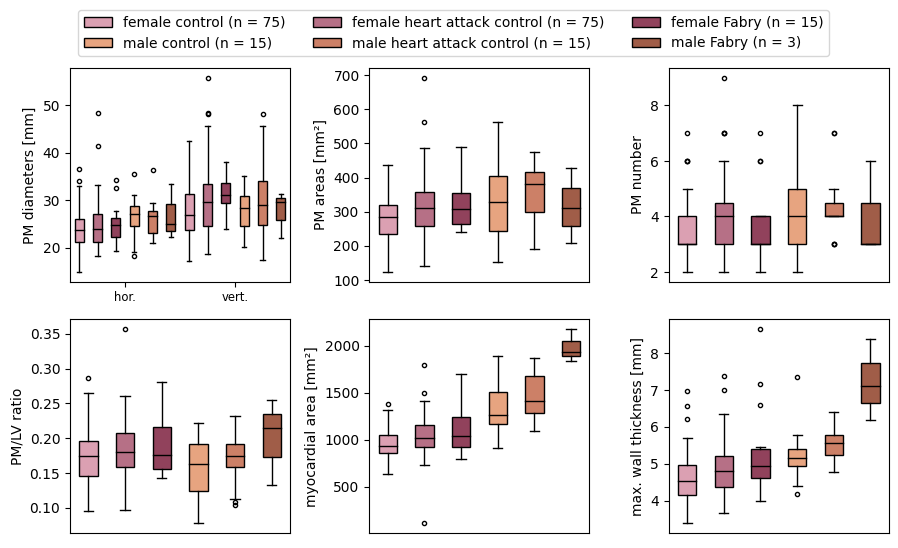

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from ukb_functions import plot_measurements, thesis_colors

colors = thesis_colors('lmd')[3:9]

# sort measurements
fabry_table = pd.read_csv('/opt/notebooks/fabry_table-2.csv')
control_table = pd.read_csv('/opt/notebooks/control_table-3.csv')
ha_table = pd.read_csv('/opt/notebooks/heart_attack_wo_fabry_table.csv')

f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements-3.csv')
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements-3.csv')
h_measurements = pd.read_csv('/opt/notebooks/results/ha_measurements.csv')

for m, t in zip([f_measurements, h_measurements, c_measurements], [fabry_table, ha_table, control_table]):
    m['sex'] = [0]*len(m['id'])
    for i, this_id in enumerate(m['id'].to_list()):
        m.loc[i, 'sex'] = t.loc[t['Participant ID'] == this_id, 'Sex'].values[0]

f_measurements_m = f_measurements.loc[f_measurements['sex'] == 'Male'].copy()
f_measurements_f = f_measurements.loc[f_measurements['sex'] == 'Female'].copy()
c_measurements_m = c_measurements.loc[c_measurements['sex'] == 'Male'].copy()
c_measurements_f = c_measurements.loc[c_measurements['sex'] == 'Female'].copy()
h_measurements_m = h_measurements.loc[h_measurements['sex'] == 'Male'].copy()
h_measurements_f = h_measurements.loc[h_measurements['sex'] == 'Female'].copy()

labels = ['female control', 'female heart attack control', 'female Fabry', 'male control', 'male heart attack control', 'male Fabry']
labels = [l+' (n = '+str(len(m))+')' for l, m in zip(labels, [c_measurements_f, h_measurements_f, f_measurements_f, c_measurements_m, h_measurements_m, f_measurements_m])]

plot_measurements_mod(
    [c_measurements_f, h_measurements_f, f_measurements_f, c_measurements_m, h_measurements_m, f_measurements_m], 
    labels=labels, 
    colors=colors, save_stats=False)

### Compare Phenotypes

/tmp/ipykernel_468/2693379624.py:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, ncols, sub)
/tmp/ipykernel_468/2693379624.py:111: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, ncols, sub)
/tmp/ipykernel_468/2693379624.py:159: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, ncols, sub)


          control classical (n = 25) vs heart attack classical (n = 25)  \
p(hor.)                                             0.151056              
p(vert.)                                            0.712386              
p(area)                                             0.277197              
p(num)                                              0.116834              
p(pm/lv)                                            0.800858              
p(ma)                                               0.052339              
p(mwt)                                              0.039715              
d(hor.)                                             0.392285              
d(vert.)                                             0.09483              
d(area)                                             0.117215              
d(num)                                              0.289485              
d(pm/lv)                                            0.061667              
d(ma)                    

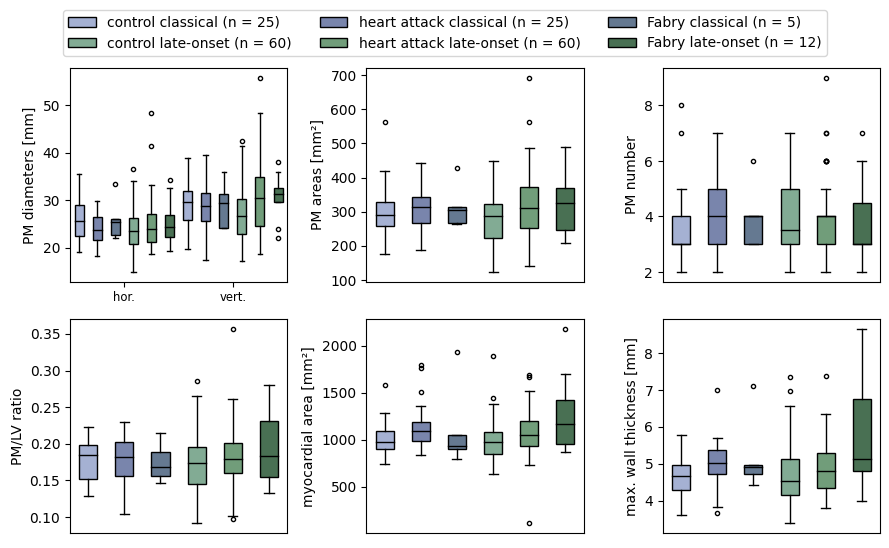

In [ ]:
import pandas as pd
from ukb_functions import plot_measurements, thesis_colors

colors = thesis_colors('ld')[6:]

# get measurements
f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements-3.csv')
c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements-3.csv')
h_measurements = pd.read_csv('/opt/notebooks/results/ha_measurements.csv')

# sort measurements

pht_table = pd.read_csv('/opt/notebooks/Phenotypes.csv')

f_measurements['phenotype'] = ['']*len(f_measurements['id'])

for i, this_id in enumerate(f_measurements['id']):
    try:
        p = pht_table.loc[pht_table['Patient ID'] == this_id, ' Phenotype'].values[0]
    except:
        p = 'unclear'
    f_measurements.loc[i, 'phenotype'] = p

f_measurements_cl = f_measurements.loc[f_measurements['phenotype'] == ' classic'].copy()
f_measurements_lo = f_measurements.loc[f_measurements['phenotype'] == ' late onset'].copy()

# get matched controls
cl_ids = f_measurements_cl['id'].tolist()
lo_ids = f_measurements_lo['id'].tolist()
c_measurements_cl = c_measurements.loc[c_measurements['match for'].isin(cl_ids)].copy()
c_measurements_lo = c_measurements.loc[c_measurements['match for'].isin(lo_ids)].copy()
h_measurements_cl = h_measurements.loc[h_measurements['match for'].isin(cl_ids)].copy()
h_measurements_lo = h_measurements.loc[h_measurements['match for'].isin(lo_ids)].copy()

labels = ['control classical', 'heart attack classical', 'Fabry classical', 'control late-onset', 'heart attack late-onset', 'Fabry late-onset']
labels = [l+' (n = '+str(len(m))+')' for l, m in zip(labels, [c_measurements_cl, h_measurements_cl, f_measurements_cl, c_measurements_lo, h_measurements_lo, f_measurements_lo])]

plot_measurements_mod(
    [c_measurements_cl, h_measurements_cl, f_measurements_cl, c_measurements_lo, h_measurements_lo, f_measurements_lo], 
    labels=labels,
    colors=colors)

## Test Normality

In [ ]:
import pandas as pd
import scipy

# test normality of groups

c_measurements = pd.read_csv('/opt/notebooks/results/control_measurements.csv').to_dict('list')
h_measurements = pd.read_csv('/opt/notebooks/results/ha_measurements.csv').to_dict('list')
f_measurements = pd.read_csv('/opt/notebooks/results/fabry_measurements.csv').to_dict('list')

d = {'Group': [], 'Metric': [], 'p value': [], 'Distribution': []}

def test_normality(X, g, m):
    d['Group'].append(g)
    d['Metric'].append(m)
    
    _, p = scipy.stats.shapiro(X)
    d['p value'].append(round(p, 5))
    if p < 0.05:
        d['Distribution'].append('non-normal')
    else:
        d['Distribution'].append('normal')


for group, name in zip([c_measurements, h_measurements, f_measurements], ['control', 'heart attack control', 'Fabry']):
    
    # h. diameters
    test_normality(group['hdiam1']+group['hdiam2'], name, 'hor. diameters')
    
    # v. diameters
    test_normality(group['vdiam1']+group['vdiam2'], name, 'vert. diameters')
    
    # remaining metrics
    for m in ['area', 'num', 'pm/lv ratio', 'ma', 'mwt']:
        test_normality(group[m], name, m)

df = pd.DataFrame.from_dict(d, 'columns')
df.to_csv('/opt/notebooks/results/normality.csv', index=False)

df

,Group,Metric,p value,Distribution
0,control,hor. diameters,0.00001,non-normal
1,control,vert. diameters,0.00036,non-normal
2,control,area,0.13151,normal
3,control,num,0.00000,non-normal
4,control,pm/lv ratio,0.75922,normal
5,control,ma,0.00000,non-normal
6,control,mwt,0.00024,non-normal
7,heart attack control,hor. diameters,0.00000,non-normal
8,heart attack control,vert. diameters,0.00000,non-normal
9,heart attack control,area,0.01549,non-normal


## Miscellaneous

          control vs Fabry
p(hor.)           0.224827
p(vert.)          0.092725
p(area)           0.116285
p(num)            0.788423
p(pm/lv)          0.155017
p(ma)             0.033081
p(mwt)            0.010232
d(hor.)           0.100641
d(vert.)          0.219767
d(area)           0.358664
d(num)             0.10696
d(pm/lv)           0.41387
d(ma)             0.626437
d(mwt)            0.747415
MD(hor.)           0.39063
MD(vert.)         1.045705
MD(area)         33.873942
MD(num)           0.177778
MD(pm/lv)         0.002059
MD(ma)          234.432237
MD(mwt)           0.907845


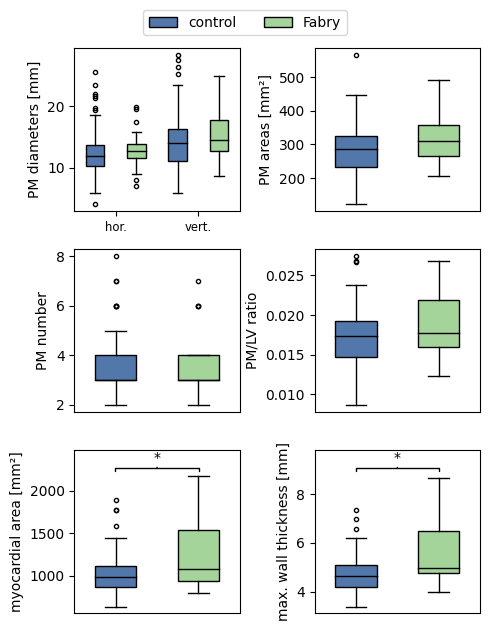

In [ ]:
## make vertical boxplot figure for ISMB abstract
## !! there is an error in the plotted PM/LV ratio, if you want to use this, run again with correct measurements files

import cv2
from glob import glob
import io
import itertools
from math import sqrt
import matplotlib as mpl
import matplotlib.pyplot as plt
import nibabel as nib
import numbers
import numpy as np
import scipy
import skimage as ski
from statistics import mean, stdev
import os
import pandas as pd
import pydicom
import zipfile

from ukb_functions import *

def plot_measurements(measurements_list, labels, colors=[]):
    '''
    Plot measurements as violin plots    

    arguments:
        measurements_list:  list of dicts containing measurements
        labels:             list of group names
        colors:             specify list of colors to be used for lvm, bp and pm segmentations, or leave empty for default colors
    '''    

    if colors == []:
        # colors = get_colors(ibm_colors(), len(measurements_list))
        colors = get_colors(thesis_colors(), len(measurements_list))
    elif len(colors) != len(measurements_list):
        colors = get_colors(colors, len(measurements_list))
    
    colors = [mpl.colors.to_rgb(c) for c in colors]
    alpha = 0.8
    
    flierprops = dict(marker='.', markersize=6)

    # inititate statistics dataframe
    if len(measurements_list) > 1:
        stats = ['p', 'd', 'MD']
        meas = ['hor.', 'vert.', 'area', 'num', 'pm/lv', 'ma', 'mwt']
        statnames = [s+'('+m+')' for s in stats for m in meas]
        combs = itertools.combinations(labels, 2)
        combnames = [a+' vs '+b for a, b in combs]
        statistics = pd.DataFrame(columns=combnames, index=statnames)

    nsubs = sum([m in measurements_list[0] for m in ['hdiam1', 'area', 'num', 'pm/lv ratio', 'ma', 'mwt']])
    # ncols = int((nsubs+1)/2)
    nrows = int((nsubs+1)/2)
    fig, _ = plt.subplots(nrows, 2, figsize=(5, 2*nrows))

    sub = 1

    # plot diameters
    if 'hdiam1' in list(measurements_list[0].keys()):
        plt.subplot(nrows, 2, sub)

        m = []
        for group in measurements_list:     # structure measurements for plot
            m.extend([group['hdiam1']+group['hdiam2']])
        for group in measurements_list:
            m.extend([group['vdiam1']+group['vdiam2']])

        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)*2), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], [c for c in colors+colors]):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors([c for c in colors+colors])
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)*2), flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], [c for c in colors+colors]):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        l = ['hor.', 'vert.']
        pos = [len(measurements_list)/2-0.5, len(measurements_list)/2+len(measurements_list)-0.5]
        plt.xticks(pos, l, fontsize='small')
        plt.ylabel('PM diameters [mm]')
        
        sub += 1


        # calculate statistics
        if len(measurements_list) > 1:
            mh = [[group['hdiam1']+group['hdiam2']] for group in measurements_list]
            mv = [[group['vdiam1']+group['vdiam2']] for group in measurements_list]
            for cbh, cbv, cbn in zip(itertools.combinations(mh, 2), itertools.combinations(mv, 2), combnames):
                # p value
                statistics.loc['p(hor.)', cbn] = scipy.stats.mannwhitneyu(cbh[0][0], cbh[1][0])[1]
                statistics.loc['p(vert.)', cbn] = scipy.stats.mannwhitneyu(cbv[0][0], cbv[1][0])[1]

                # cohen's d
                statistics.loc['d(hor.)', cbn] = cohens_d(cbh[0][0], cbh[1][0])
                statistics.loc['d(vert.)', cbn] = cohens_d(cbv[0][0], cbv[1][0])

                # mean difference
                statistics.loc['MD(hor.)', cbn] = mean_difference(cbh[0][0], cbh[1][0])
                statistics.loc['MD(vert.)', cbn] = mean_difference(cbv[0][0], cbv[1][0])

            # annotate significance
            if len(measurements_list) == 2:
                if statistics.loc['p(hor.)', cbn] < 0.05:
                    plt.annotate('p = '+str(np.round(statistics.loc['p(hor.)', cbn], 5)),
                                xytext=(0.5, 0.92),
                                textcoords=('data', 'axes fraction'), 
                                xy=(0.5, 0.9), 
                                xycoords=('data', 'axes fraction'), 
                                ha='center', va='bottom', 
                                arrowprops=dict(arrowstyle='-[, widthB=2'))
                if statistics.loc['p(vert.)', cbn] < 0.05:
                    plt.annotate('p = '+str(np.round(statistics.loc['p(vert.)', cbn], 5)),
                                xytext=(2.5, 0.92),
                                textcoords=('data', 'axes fraction'), 
                                xy=(2.5, 0.9), 
                                xycoords=('data', 'axes fraction'),

                                ha='center', va='bottom', 
                                arrowprops=dict(arrowstyle='-[, widthB=2'))
                if statistics.loc['p(hor.)', cbn] < 0.05 or statistics.loc['p(vert.)', cbn] < 0.05:
                    _, t = plt.ylim()
                    plt.ylim(top=t*1.1)
    
    # plot areas
    if 'area' in list(measurements_list[0].keys()):
        plt.subplot(nrows, 2, sub)

        m = [group['area'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        

        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('PM areas [mm²]')

        sub += 1

        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(area)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                statistics.loc['d(area)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(area)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2 and statistics.loc['p(area)', cbn] < 0.05:
                plt.annotate('p = '+str(np.round(statistics.loc['p(area)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=3'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)

    # plot pm numbers
    if 'num' in list(measurements_list[0].keys()):
        plt.subplot(nrows, 2, sub)

        m = [group['num'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('PM number')
        
        sub += 1

        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(num)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                statistics.loc['d(num)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(num)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2 and statistics.loc['p(num)', cbn] < 0.05:
                plt.annotate('p = '+str(np.round(statistics.loc['p(num)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=3'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
    
    # plot pm/lv ratio
    if 'pm/lv ratio' in list(measurements_list[0].keys()):
        plt.subplot(nrows, 2, sub)

        m = [group['pm/lv ratio'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')

        plt.xticks([]);
        plt.ylabel('PM/LV ratio')
        
        sub += 1

        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(pm/lv)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                statistics.loc['d(pm/lv)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(pm/lv)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2 and statistics.loc['p(pm/lv)', cbn] < 0.05:
                plt.annotate('p = '+str(np.round(statistics.loc['p(pm/lv)', cbn], 5)),
                             xytext=(0.5, 0.92),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.9), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=3'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
            
    if 'ma' in list(measurements_list[0].keys()):
        plt.subplot(nrows, 2, sub)
        
        m = [group['ma'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('myocardial area [mm²]')
        
        sub += 1
        
        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(ma)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                #statistics.loc['d(lvm area)', cbn] = cohens_d(cb[0], cb[1])
                statistics.loc['d(ma)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(ma)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2 and statistics.loc['p(ma)', cbn] < 0.05:
                # plt.annotate('p = '+str(np.round(statistics.loc['p(lvm area)', cbn], 5)),
                plt.annotate('*',
                             xytext=(0.5, 0.91),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.89), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=3'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
            
    if 'mwt' in list(measurements_list[0].keys()):
        plt.subplot(nrows, 2, sub)
        
        m = [group['mwt'] for group in measurements_list]  # structure measurements for plot
        # viols = plt.violinplot(m, positions=range(0, len(measurements_list)), showmeans=True, showextrema=True)
        # for item in viols:
        #     if item == 'bodies':
        #         for body, color in zip(viols[item], colors):
        #             body.set_color(color)
        #     else:
        #         viols[item].set_colors(colors)
        
        boxes = plt.boxplot(m, positions=range(0, len(measurements_list)), widths=0.5, flierprops=flierprops, patch_artist=True)
        for patch, color in zip(boxes['boxes'], colors):
            patch.set_facecolor(color+(alpha,))
        for patch in boxes['medians']:
            patch.set_color('black')
        
        plt.xticks([]);
        plt.ylabel('max. wall thickness [mm]')
        
        sub += 1
        
        # calculate statistics
        if len(measurements_list) > 1:
            for cb, cbn in zip(itertools.combinations(m, 2), combnames):
                # p value
                statistics.loc['p(mwt)', cbn] = scipy.stats.mannwhitneyu(cb[0], cb[1])[1]

                # cohen's d
                #statistics.loc['d(lvm area)', cbn] = cohens_d(cb[0], cb[1])
                statistics.loc['d(mwt)', cbn] = cohens_d(cb[0], cb[1])

                # mean difference
                statistics.loc['MD(mwt)', cbn] = mean_difference(cb[0], cb[1])

            # annotate significance
            if len(measurements_list) == 2 and statistics.loc['p(mwt)', cbn] < 0.05:
                # plt.annotate('p = '+str(np.round(statistics.loc['p(mwt)', cbn], 5)),
                plt.annotate('*',
                             xytext=(0.5, 0.91),
                             textcoords=('data', 'axes fraction'), 
                             xy=(0.5, 0.89), 
                             xycoords=('data', 'axes fraction'), 
                             ha='center', va='bottom', 
                             arrowprops=dict(arrowstyle='-[, widthB=3'))
                _, t = plt.ylim()
                plt.ylim(top=t*1.1)
    
    patches = [mpl.patches.Patch(facecolor=c+(alpha,), edgecolor='black', label=l) for c, l in zip(colors, labels)]
    fig.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncols=len(measurements_list))
    plt.tight_layout()

    # print statistics
    if len(measurements_list) > 1:
        print(statistics)

plot_measurements([c_measurements, f_measurements], labels=['control', 'Fabry'], colors=cctb_colors())